# TF2 Softmax Regression

## Multinomial Classification
* 여러 클래스를 분류하는 방법
    * 각 클래스별 Weight 계산 필요
    * 이진 분류기를 여러번 쓰는 것
    * 하나의 행렬로 계산
    * 이진 분류기를 여러번 쓰는 방법에 비해 행렬 연산을 하는 것이 효과적
* 이진 분류기를 여러번 쓰는 것
    * 클래스 A 모델:
    $\begin{bmatrix}x_1 & x_2 \end{bmatrix}
    \begin{bmatrix}w_{a1} \\ w_{a2}\end{bmatrix}
    = \begin{bmatrix}w_{a1}x_1 +w_{a2}x_2\end{bmatrix}$
    * 클래스 B 모델:
    $\begin{bmatrix}x_1 & x_2 \end{bmatrix}
    \begin{bmatrix}w_{b1} \\ w_{b2}\end{bmatrix}
    =\begin{bmatrix}w_{b1}x_1 +w_{b2}x_2\end{bmatrix}$
    * 클래스 C 모델:$\begin{bmatrix}x_1 & x_2 \end{bmatrix}
    \begin{bmatrix}w_{c1} \\ w_{c2}\end{bmatrix}
    =\begin{bmatrix}w_{c1}x_1 +w_{c2}x_2\end{bmatrix}$
* 하나의 행렬로 계산
    * $\begin{bmatrix}x_1 & x_2 \end{bmatrix}
    \begin{bmatrix}w_{a1}  & w_{b1} & w_{c1} \\ w_{a2} & w_{b2} &w_{c2}  \end{bmatrix}
    = \begin{bmatrix}w_{a1}x_1 +w_{a2}x_2 & w_{b1}x_1 +w_{b2}x_2 & w_{c1}x_1 +w_{c2}x_2 \end{bmatrix}$

### One-Hot Encoing
* 범주형 데이타를 숫자로 표현할 방법 필요
   * 예) {dog:0, cat:1, cow:2}
   * 범주 숫자가 크기(scale)를 갖는 문제
       * $cat > dog : True ???$
       * $cow - dog = 2 ???$
       * $cat + dog = cow ???$
* One-Hot Encoding
    * 범주 갯수와 같은 길이의 배열
    * 범주와 같은 인덱스 요소만 1이고 나머지는 0으로 구성
    * 예) {dog:0, cat:1, cow:2} : 범주 갯수=3
        * dog(0) : \[1,0,0\]
        * cat(1) : \[0,1,0\]
        * cow(2) : \[0,0,1\]
* One-Hot encoding API
    * NumPy : `np.eye()` +  Fancy Indexing
        * `np.eye(classes)`: 대각 행렬 생성
        * 예) `np.eye(3)[[0, 1, 1, 0, 2]]`
    * TF : `tf.keras.utils.to_categorical(y, num_clases)`
        * `y` : class vector
        * `num_classes` : 범주의 갯수


In [1]:
classes = 3
label= [0, 1, 1, 0, 2]

In [2]:
import numpy as np
np.eye(classes)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [3]:
np.eye(3)[label]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [4]:
import tensorflow as tf
classes = 3
label= [0, 1, 1, 0, 2]
tf.keras.utils.to_categorical(label, num_classes=classes)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

### Softmax 함수
* 다항 로지스틱 회귀
    * 여러 클래스에 대한 각각의 $H(x)$를 확률로 변형 필요
    * Sigmoid 대신 Softmax 함수 사용
* Softmax
    * $\displaystyle P(z) = \frac{e^{z_i}}{e^{z_0} + e^{z_1} + e^{z_2}... + e^{z_k}}= \frac{e^{z_i}}{\sum_{k=1}^ke^{z_k}} (for \, i=1,2,...,K)$
    * 확율
    * 각 클래스의 출력을 0~1 사이의 값으로 변환, * 모든 클래스의 값의 합은 1
* Tensorflow API
    * `tf.nn.softmax(logits)`
        * types : float16(half), float32, float64

In [5]:
import numpy as np

logits = np.array([2,1,3], dtype=np.float32)
print("logits", logits)

p = np.exp(logits) / np.sum(np.exp(logits))

print("probability:", p, "sum:", np.sum(p))

logits [2. 1. 3.]
probability: [0.24472848 0.09003057 0.66524094] sum: 1.0


In [6]:
import tensorflow as tf

logits = np.array([2,1,3], dtype=np.float32)
print("logits", logits)

p = tf.nn.softmax(logits)
print("probability:", p.numpy(), "sum:", tf.reduce_sum(p).numpy())

logits [2. 1. 3.]
probability: [0.24472848 0.09003057 0.66524094] sum: 1.0


### Argmax Softmax Prediction
* $\hat{y} = argmax(\hat{p})$
* Softmax 결과에서 확률이 가장 높은 클래스의 Index 반환
* API 
    * `np.argmax(p)`
    * `tf.argmax(p)`

In [7]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

logits = np.array([2,1,3], dtype=np.float32)
p = np.exp(logits) / np.sum(np.exp(logits))
print("argmax:", np.argmax(p))

p2 = tf.nn.softmax(logits)
print("argmax:", tf.argmax(p2).numpy())

argmax: 2
argmax: 2


### Cross Entropy Cost 함수
* Softmax의 비용함수 
    * $\displaystyle Cost(W) =  -\frac{1}{m}\sum_{i=1}^m y \cdot log(p) = \frac{1}{m}\sum_{i=1}^m -y \cdot log(p)$
    * Binary Cross Entropy의  $y=1$ 경우를 모두 합한 형태
* Cross Entropy cost 함수 원리
    * 소프트맥스를 통과한 결과값 $p$는 어떤 특정한 클래스만 큰 값을 갖고 나머지는 아주 작은 값을 갖는다.
    * One-hot encoding 된 $y$는 정답 클래스인 경우만 1을 나머지는 0을 가지고 있다.
    * $p$와 $y$를 곱하면 정답만 남고 나머지는 0으로 사라진다.
    * $-log(p)$함수를 적용하면 0에 가까운 값은 매우 커지고 1에 가까운 값은 0에 가까워 진다.
    * 따라서 $y\cdot -log(p)$는 정답과 틀리면 매우 큰 값을 갖고 정답에 맞으면 0에 가까운 값이 나오므로 비용함수로 적합하다.

c:\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


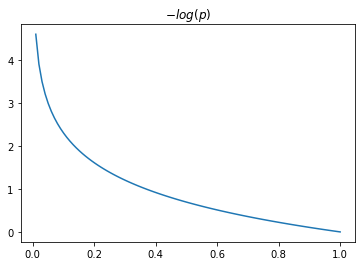

In [8]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def drawLogNegative():
    p = np.linspace(0, 1, 100)
    y = -np.log(p)
    plt.plot(p, y)
    plt.title("$-log(p)$")
drawLogNegative()

###  Cross Entorypy Cost 예시
* 정답 = \[0,1,0\]
* 틀린 예측 = \[0.99, 0.006, 0.004\]
* 맞는 예측 = \[0.01, 0.97, 0.02\]

In [9]:
y = np.array([0,1,0], dtype=np.float32)
t_logit = np.array([5, 2, 1], dtype=np.float32)
f_logit = np.array([1, 5, 2], dtype=np.float32)

fp = tf.nn.softmax(t_logit)
tp = tf.nn.softmax(f_logit)
print(f'y\t {y}')
print(f'p\t wrong:{fp},\t right:{tp}')
flogs = -np.log(fp)
tlogs = -np.log(tp)
print(f'-log(p)\t wrong : {flogs},\t right:{tlogs}')

fc = np.sum( flogs * y)
tc = np.sum( tlogs * y)
print(f'cost\t wrong:{fc},\t right:{tc}')

y	 [0. 1. 0.]
p	 wrong:[0.93623954 0.04661262 0.01714783],	 right:[0.01714783 0.93623954 0.04661262]
-log(p)	 wrong : [0.06588392 3.0658839  4.065884  ],	 right:[4.065884   0.06588392 3.0658839 ]
cost	 wrong:3.0658838748931885,	 right:0.06588391959667206


### Tensorflow API
* `tf.nn.softmax_cross_entropy_with_logits(labels, logits)`
    *  `labels` :one-hot encoded label
    * `logits` : softmax 하기 전 출력 값(내부적으로 softmax 처리)
* `tf.keras.losses.categorical_crossentropy(y_true, y_pred)`
    * `y_true` : one-hot encoded label
    * `y_pred` : predted probability
* `tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)`
    * `y_true` : non one-hot encoded label(class vector)
    * `y_pred` : predted probability

In [10]:
fc = tf.nn.softmax_cross_entropy_with_logits(y, t_logit)
tc = tf.nn.softmax_cross_entropy_with_logits(y, f_logit)
print(f'cost wrong:{fc}, right:{tc}')

cost wrong:3.0658838748931885, right:0.06588391214609146


In [11]:
tf_fc = tf.keras.losses.categorical_crossentropy(y, fp)
tf_tc = tf.keras.losses.categorical_crossentropy(y, tp)
print(f'cost\t wrong:{tf_fc},\t right:{tf_tc}')

cost	 wrong:3.0658838748931885,	 right:0.06588391214609146


In [12]:
y_label = tf.convert_to_tensor([1]) #[0,1,0]
tf_fp = tf.convert_to_tensor(fp)
tf_tp = tf.convert_to_tensor(tp)
tf_fc1 = tf.keras.losses.sparse_categorical_crossentropy(y_label, tf_fp )
tf_tc1 = tf.keras.losses.sparse_categorical_crossentropy(y_label, tf_tp)
print(f'cost\t wrong:{tf_fc1},\t right:{tf_tc1}')

cost	 wrong:[3.0658839],	 right:[0.06588391]


### Gradient of Cross Entropy
* Gradient : $\displaystyle\frac{\partial}{\partial{W}}cost(W) = \frac{1}{m}\sum_{i=1}^m((H(x)-y)x$
    * Linear Regression의 Gradient와 동일
    * Convex 하기 때문

### 다항 랜덤수 분류 예제

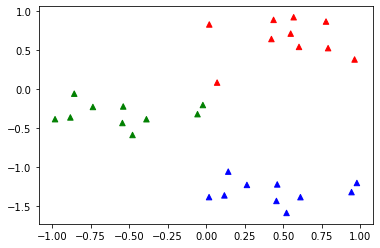

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

np.random.seed(0)
x1 = np.random.rand(10,2) 
x2 = np.random.rand(10,2) -1
x3 = np.random.rand(10,2)
x3[:, 0] = x2[:,0] + 1
x3[:, 1] = x2[:,1] - 1


X = np.concatenate((x1,x2,x3)).astype(np.float32)
label = np.zeros((30), dtype=np.int16)
label[10:20] = 1
label[20:] = 2
y = tf.keras.utils.to_categorical(label)
colormap = np.array(['r', 'g', 'b'])
plt.scatter(X[:,0], X[:,1], s=30, c=colormap[label], marker='^')


step:0, cost:3.172290086746216
step:200, cost:0.3163733184337616
step:400, cost:0.18467466533184052
step:600, cost:0.1405775547027588
step:800, cost:0.11755137890577316
step:1000, cost:0.10305263102054596
step:1200, cost:0.0929173156619072
step:1400, cost:0.08534278720617294
step:1600, cost:0.07941358536481857
step:1800, cost:0.07461167871952057
step:2000, cost:0.07062053680419922
step:2200, cost:0.06723454594612122
step:2400, cost:0.06431405991315842
step:2600, cost:0.06176048144698143
step:2800, cost:0.05950198322534561
step:3000, cost:0.05748502537608147
step:3200, cost:0.05566859990358353
step:3400, cost:0.054020870476961136
step:3600, cost:0.052516594529151917
step:3800, cost:0.0511355958878994
step:4000, cost:0.04986134544014931
step:4200, cost:0.04868030920624733
step:4400, cost:0.04758130759000778
step:4600, cost:0.046554844826459885
step:4800, cost:0.04559300094842911
step:5000, cost:0.044688913971185684
Accuracy:1.0


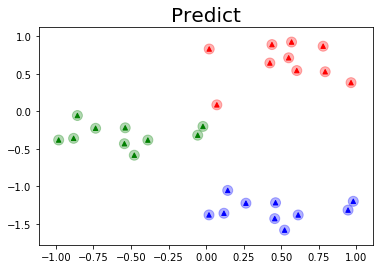

In [14]:
plt.scatter(X[:,0], X[:,1], s=20, c=colormap[label], marker='^')

W = tf.Variable(tf.random.normal([2, 3], seed=0))
b = tf.Variable(tf.random.normal([3], seed=0))
learning_rate = 0.05
opt = tf.keras.optimizers.SGD(learning_rate)
for step in range(5001):
    with tf.GradientTape() as tape:
        h = tf.matmul(X, W) + b
        p = tf.nn.softmax(h)
        cost = tf.reduce_mean(-tf.reduce_sum(y * tf.math.log(p), axis=1))
        #cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=h))
        #cost = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y, p))
        #cost = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(label, p))
    d_W, d_b = tape.gradient(cost, [W, b])
    #W.assign_sub(learning_rate * d_W)
    #b.assign_sub(learning_rate * d_b)
    opt.apply_gradients(zip([d_W, d_b], [W, b]))
    if step % 200 == 0:
            print("step:{}, cost:{}".format(step, cost))

predict = tf.argmax(p, axis=1, name='predict')
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, label),tf.float32))
print("Accuracy:{}".format(accuracy))

plt.title('Predict', size=20)
colormap = np.array(['r', 'g', 'b'])
plt.scatter(X[:,0], X[:,1], s=100, c=colormap[predict.numpy()], alpha=0.3)
